# 109AL-F18 Analysis Notebook

### ***Authors***: Keith Mitchell/Chris Dao
#### Some helpful links are shown below regarding Jupyter Notebooks and what it is. Jupyter is a great platform for visualizing and actively working with data. We have put together a notebook that is meant to work based on your isolate spreadsheet being uploaded. 

Class outline:

* A quick installation check of [ipython](https://ipython.org/install.html) and [jupyter notebook](https://jupyter.readthedocs.io/en/latest/install.html)
* An overview of the IPython project from [the official website](http://ipython.org), and [jupyter](https://jupyter.org)
* Super basic intro to the notebook: typing code.
* [Notebook Basics](examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Customizing IPython - a condensed version](exercises/Customization/Condensed.ipynb)
* [Running a Secure Public Notebook Server](examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter/IPython works](examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

# Initial Setup
+ Install libraries still needed
    + OS: library for working with operating system where python is running
+ Import libraries
    + **Pandas**: library for working with dataframes (csv, tsv, excel, etc)
    + **Seaborn**: library for visualizing data (especially those in Pandas format)
    + **Scipy Stats**: library for statistical functions, here is a link to the functions 
        + https://docs.scipy.org/doc/scipy/reference/stats.html
+ Clean current excel imported csv, main thing here is we are collapsing the header rows to one columns
+ **IMPORTANT**: just check out what is printed before the next cell (see `print (new_header)`) this will be the data we are working with.
   

### First step paste the name of your file here in "" quotes. 

In [10]:
file_name = "109AL-F18_IsolateSpreadsheet.csv"

In [58]:
# install libraries still needed.
import os
os.system('pip install seaborn')

%matplotlib inline


# import libraries of needed
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
data = pd.read_csv(file_name, encoding="latin1")

# clean the first few rows, and make a new header row
new_header = data.iloc[1] #grab the first row for the header
data = data[2:] #take the data less the header row
data.columns = new_header #set the header row as the df header

new_header = []
for row, header in zip(data.iloc[0], data.columns):
    if header and str(header) !='nan' and str(header) != 'NaN':
        recent_header=header
    if row and str(row) !='nan' and str(row) != 'NaN':
        new_header += [str(recent_header) + ' ' + str(row)]
    else:
        new_header += [header]  

data = data[1:] #take the data less the header row
data.columns = new_header #set the header row as the df header  
data = data.apply(pd.to_numeric, errors = "ignore") #convert numeric columns to float type


# and finally lets print the data we will be working with
print (new_header)    
# and print the data types we have
print(data.dtypes)


['Isolate ID', 'Field', 'Isolate Status', 'Date of Last Streak', 'Isolate Purity', 'Number of Streaks Performed', 'Media Type', nan, 'Colony Morphology', 'Cellular Morphology', 'Size (um)', 'Motility', 'Gram Stain', 'Submitted for Sequencing?', 'Cryogenic Information', 'Catalase  Trial 1', 'Catalase  Trial 2', 'Catalase  Trial 3', 'Catalase  Overall', 'Mannitol Fermentation Trial 1', 'Mannitol Fermentation Trial 2', 'Mannitol Fermentation Trial 3', 'Mannitol Fermentation Overall', 'Yellow Pigment Trial 1', 'Yellow Pigment Trial 2', 'Yellow Pigment Trial 3', 'Yellow Pigment Overall', 'Spore Forming Trial 1', 'Spore Forming Trial 2', 'Spore Forming Trial 3', 'Spore Forming Overall', 'Catalase Trial 1', 'Catalase Trial 2', 'Catalase Trial 3', 'Catalase Overall', 'Glucose Fermentation Trial 1', 'Glucose Fermentation Trial 2', 'Glucose Fermentation Trial 3', 'Glucose Fermentation Overall', 'Oxidase Test Trial 1', 'Oxidase Test Trial 2', 'Oxidase Test Trial 3', 'Oxidase Test Overall', 'Gluco

In [59]:
data.head()

,Isolate ID,Field,Isolate Status,Date of Last Streak,Isolate Purity,Number of Streaks Performed,Media Type,nan,Colony Morphology,Cellular Morphology,...,SXT Trial 3,SXT Average,TE30 Trial 1,TE30 Trial 2,TE30 Trial 3,TE30 Average,Daptomycin Trial 1,Daptomycin Trial 2,Daptomycin Trial 3,Daptomycin Average
3,F18UCLA1091AGA30M01,11,Active,10/15/18,Pure,1,RDM,RDM,"Circular, convex",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F18UCLA1091AGA30M02,11,Active,10/15/18,Pure,1,RDM,RDM,"Circular, raised, entire, smooth, translucent,...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,F18UCLA1091AGA30M03,11,Active,10/15/18,Pure,1,RDM,RDM,"Circular, raised, entire, smooth, translucent,...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,F18UCLA1091AGA30M04,11,Active,10/15/18,Pure,1,RDM,RDM,"circular, flat, entire, dull, white, opaque",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,F18UCLA1091AGA30M05,11,Active,10/15/18,Pure,1,RDM,RDM,"Circular, entire",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
def my_star(p_value):
    if p_value <= 0.001:
        return "***"
    elif p_value <= 0.01:
        return "**"
    elif p_value <= 0.05:
        return "*"
    else:
        return "None"

## Sample Purity Thus Far and by Sample Distribution

In [61]:
purity = data.groupby(['Isolate Purity']).size().reset_index(name='# Isolates')
purity.head()

,Isolate Purity,# Isolates
0,Not pure,18
1,Pure,22


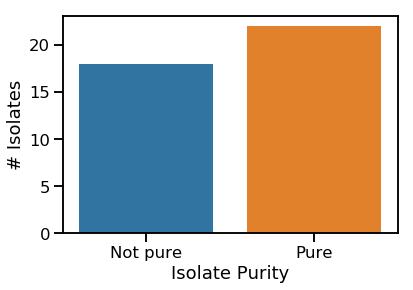

In [62]:
sns.set_context('talk')
ax = sns.barplot(x="Isolate Purity", y="# Isolates", data=purity)

In [63]:
purity_field = data.groupby(['Isolate Purity','Field']).size().reset_index(name='# Isolates')
purity_field.head()

,Isolate Purity,Field,# Isolates
0,Not pure,10,10
1,Not pure,11,8
2,Pure,10,10
3,Pure,11,12


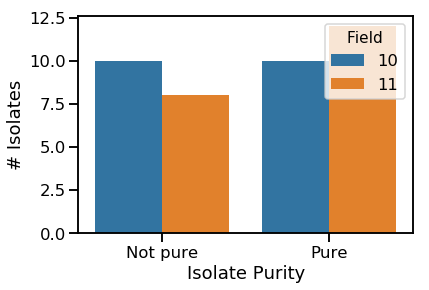

In [64]:
ax = sns.barplot(x="Isolate Purity", y="# Isolates", hue='Field', data=purity_field)
ax
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Gram Stains by Sample Distribution

In [65]:
gram_stain = data.groupby(['Field', 'Gram Stain']).size().reset_index(name='Isolates')
gram_stain.head()
gram_stain = pd.crosstab(data["Field"], data["Gram Stain"])
gram_stain_2 = gram_stain.stack().reset_index(name = "Isolates")
gram_stain_2

,Field,Gram Stain,Isolates
0,10,+,11
1,10,-,9
2,11,+,12
3,11,-,7


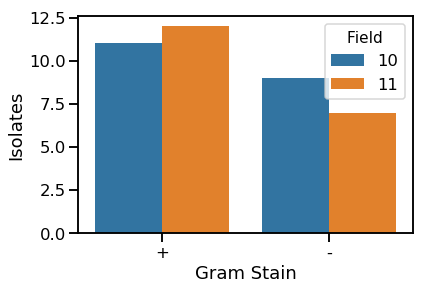

In [66]:
sns.set_context('talk')
#ax = sns.barplot(x="Gram Stain", y="Isolates", hue='Field', data=gram_stain)
ax = sns.barplot(x="Gram Stain", y="Isolates", hue='Field', data=gram_stain_2)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### TYPES OF DATA:
The type of variable you have dictates the types of statistical tests you would run. There are two types of variables:

***Numeric***: The variable can be expressed as a number (ie, Temperature, Elevation, pH)

***Categorical***: The variable cannot be expressed as a number, but is instead a qualitative category (ie, Gender, season)

Statistical tests are run to compare two or more variables. In an experiment, researchers manipulate the ***independent variable*** to see if there is a change in the ***dependent variable***, which is the variable measured in the experiment. 

### STATISTICAL TEST 1: CHI SQUARED TEST

If both the independent and the dependent variable are categorical, a **chi-squared** test can be used. When both variables are categorical, the *frequencies* of the variables can be compared by constructing a *contingency* table. The chi-squared test is then run on the contingency table. 

For example, consider the following sample purity contingency table constructed by counting the number of isolates in Field 10 and 11 that were Pure or Not Pure:

In [67]:
exampleDataframe = pd.DataFrame({'Field': ['Field 10', 'Field 11'], 'Pure':[10, 4], 'Not pure': [3, 3]})
exampleDataframe = exampleDataframe.set_index('Field')
exampleDataframe

,Pure,Not pure
Field,,
Field 10,10,3
Field 11,4,3


The null hypothesis of the chi-squared test is that the two variables *purity* and *field number* are *independent* from each other. In other words, if you know the identity of one variable, say, *purity*, you gain no additional information about the other variable. The alternative hypothesis is that the two variables are related to each other, so that information about one variable can help you predict the value of the other variable.

The assumptions of the chi-squared test are as follows:
- Simple random sampling
- Sufficiently large sample size (so that the central limit theorem holds and the sampling distribution is normal)
- Observations are independent of one another

The **odds ratio** is a measure of the **effect size** of this comparison. It is good practice to report both the p-value and the corresponding effect size of statistical comparisons. 

**Fisher's Exact Test** works similarly to the chi-squared test but is accurate even with small sample sizes, so it is recommended when comparing two categorical variables when working with a small sample size. 

### **STATISTICAL TEST 2: T-TEST**

The t-test can used when the independent variable is categorical but the dependent variable is numeric. A t-test is used when there are one or two possible values for the independent variable, and a generalization of the t-test, called **ANOVA** is used when there are three or more possible values for the independent variable. 

A t-test can be used to determine whether the means of two samples are statistically significantly different from each other. There are three types of t-tests:

**One-sample t-test**: Test the null hypothesis that the sample mean is equal to some mean determined by the researcher. For example, a researcher could measure the heights of 100 UCLA undergraduates and use the one-sample t-test to test whether or not the mean is statistically significantly different than 68 inches.

**Two-sample t-test**: Test the null hypothesis that the means of two samples are equal to each other. For example, a researcher could measure the heights of 100 UCLA undergraduates and 100 USC undergraduates, compute the means of the two samples, and then use the two-sample t-test to determine if the heights of UCLA and USC undergraduates are different from each other.

**Paired t-test**: The paired t-test is the same as the two-sample t-test, but is used when the entries in the two samples are *dependent*, or matched with one another. For example, a researcher could measure the height of 100 UCLA undergraduates in January, and then the height of the *same* 100 UCLA undergraduates in March, and test whether those heights are different from each other in those two months using a paired t-test.

There are multiple measures for the **effect size** of a two-sample comparison, but some of them include reporting the difference between the two means, recording the ratio of the two means, and **Cohen's D**, the difference in means divided by the (pooled) standard deviation of the samples, which can be calculated by the computer. 

### **QUESTION 1**: Propose a statistical test to tell apart these two samples in regards to the Gram Pos and Gram Neg cells. Why did you choose this test?

+ how to have them fill this part out

In [68]:
gram_keys = gram_stain.groupby(['Field']).size().reset_index(name='#')
list = gram_keys['Field'].values.tolist()
print (list)
p_value = stats.fisher_exact(gram_stain)
print ({"Odds Ratio":p_value[0], "P-Value":p_value[1]})

[10, 11]
{'Odds Ratio': 0.7129629629629629, 'P-Value': 0.7475272825662145}


### **QUESTION 2**: Propose a statistical test to tell apart these two samples in regards to the Cellulase production. Why did you choose this test?

- how to have them fill this part out

## Functional Assay Sample Analysis

In [69]:
group1=data[(data['Field'] == list[0])]
group2=data[(data['Field'] == list[1])]

p_value = stats.ttest_ind(group1["Cellulase Production (radius in mm) Average"].astype("float").values.tolist(),
                          group2["Cellulase Production (radius in mm) Average"].astype("float").values.tolist())
print({"T statistic": p_value.statistic, "P-Value": p_value.pvalue})

{'T statistic': -0.7347166870904523, 'P-Value': 0.4670221383951346}


(0, 12.52)

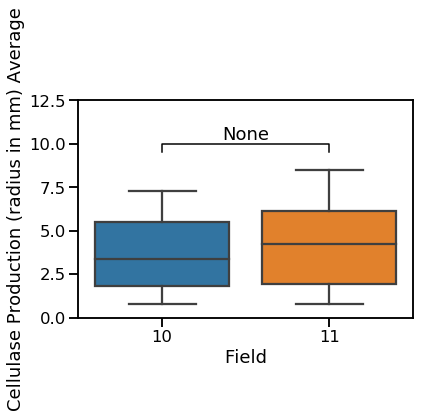

In [71]:
sns.boxplot( x = data["Field"], y = data["Cellulase Production (radius in mm) Average"])
x1, x2 = 0, 1   # columns (first column: 0, see plt.xticks())
y, h, col = data['Cellulase Production (radius in mm) Average'].max() + 1, .5, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, my_star(p_value.pvalue), ha='center', va='bottom', color=col)
plt.ylim(0,data['Cellulase Production (radius in mm) Average'].max() + 4)